In [1]:
"""
Created By    : Jared W. Marquis
Creation Date : 01 August 2022
Course        : ATSC 528 - Atmospheric Data Analysis
Assignment    : #02 - Successive Corrections

Purpose:
Script to take sparse upper air observations and analyze them on a
polar stereographic map projection using successive corrections.
[PUT MORE INFORMATION HERE - I.E., WHAT SPECIFIC THING IS BEING DONE]

"""
__author__    = "Jared W. Marquis"
__contact__   = "jared.marquis@und.edu"

In [2]:
### Import Required Modules (shouldn't need to change) ###
import numpy as np                 #numpy for math
import matplotlib.pyplot as plt    #matplotlib for plotting
import cartopy.crs as ccrs         #cartopy for plotting on map
import cartopy.feature as cfeature #cartopy basic shapefiles

In [3]:
### Read in observations ###
directory = "/Users/techadmin/ATMO528/ATSC528/"
filename = "RAOBs_201903131200.txt"
data_str = np.loadtxt("RAOBs_201903131200.txt", delimiter = ',', dtype = str)
# file = open(directory + filename)
# data = file.read()
latitude = data_str[:, 1].astype(float)
longitude = data_str[:, 2].astype(float)
g_h = data_str[:, 3].astype(float)

print(latitude)

[51.47 43.83 53.55 53.75 64.3  69.1  80.   68.3  63.75 48.53 82.52 51.27
 58.47 53.97 74.72 43.93 60.02 68.78 58.1  65.28 58.83 58.75 53.32 50.68
 50.22 53.9  35.05 45.45 57.75 40.35 58.68 40.17 42.75 35.23 61.17 55.03
 45.07 32.5  60.78 46.77 33.57 36.13 43.57 25.9  71.3  42.93 35.97 46.87
 55.2  41.66 32.9  27.77 37.77 39.86 29.37 32.17 39.78 29.37 42.7  41.62
 31.87 24.55 64.82 33.37 35.23 38.95 32.79 48.22 39.13 44.48 36.08 43.89
 38.95 39.43 40.15 48.57 19.72 32.32 30.5  18.43 10.58 41.13 30.12 34.73
 40.87 34.83 31.95 19.43 25.75 42.37 34.78 25.82 44.83 23.18 27.7  30.23
 32.85 24.57 33.02 37.73 41.32 35.4  40.87 64.5  47.7  66.87 35.22 40.67
 40.5  44.05 39.57 43.07 43.23 37.2   9.98 18.43 37.23 32.47 30.25 40.78
 44.92 57.16 27.7  47.46 30.4  39.07 32.12 47.95 44.07 36.05 37.93 32.37
 59.52 46.38 60.72]


In [4]:
### Set up analysis map with a 22x28 rectangular grid of points ###
phi0 = np.radians(60) #phi naught , 60N
psi0 = np.radians(90)-phi0
lambda0 = -115 #lamda naught, 115W
delx = 1.27 #cm
dely = 1.27 #cm
x0 = 18.90 #cm
y0 = -6.30 #cm 
x_range = np.arange(22)
y_range = np.arange(28)
print(x_range)
x_calculation = x0 + (delx*x_range) 
y_calculation = y0 + (dely*y_range)
rho = 6371000 #meters
map_scale = 1/15000000 #15 million

x = np.array(x_calculation)
y = np.array(y_calculation)
x_g, y_g = np.meshgrid(x,y)
print(x_g.shape) 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
(28, 22)


(28, 22)


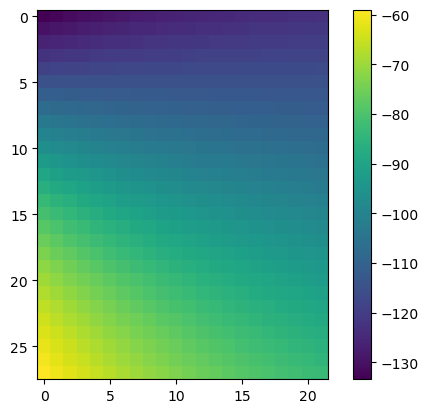

In [11]:
### convert obs lat/long to x,y ###
x_g_m = x_g/100
y_g_m = y_g/100
print(x_g_m.shape)
numer = (((((x_g_m)/map_scale)**2)+(((y_g_m)/map_scale)**2))**(1/2))
denom = rho*(1+(np.cos(psi0)))
psi = (np.pi/2) - (2*(np.arctan(numer/denom))) #x-cord, y-cord to latitude?
psi = np.degrees(psi)

lamda = (np.degrees(np.arctan(y_g_m/x_g_m)))+lambda0 #x-cord, y-cord to longitude?
# print(lamda)

# print(psi,lamda)
plt.imshow(lamda)
plt.colorbar()

In [49]:
### Create function for Cressman Analysis ###
sigma = ((1+np.sin(np.radians(60)))/(1+np.sin(np.radians(latitude))))

x_ob = rho*sigma*(np.cos(np.radians(latitude)))*(np.cos(np.radians(longitude)+np.radians(115))) #converting coords to x
y_ob = rho*sigma*(np.cos(np.radians(latitude)))*(np.sin(np.radians(longitude)+np.radians(115))) #converting coords to y
# print(y_ob.shape)
x_ob = x_ob * map_scale
y_ob = y_ob * map_scale
# print('x_ob', x_ob)
# print('y_ob', y_ob)
dmin = 0.0

# for i in range(len(x_g_m)):
#     for j in range(len(x_g_m[i])):
for i in range(len(x_ob)):
      # distance_analysis_to_ob = np.sqrt(((x_g_m[i,j]-x_ob)**2)+((y_g_m[i,j]-y_ob)**2))
      distance_ob_to_ob = np.sqrt(((x_ob[i]-x_ob)**2)+((y_ob[i]-y_ob)**2))
      # print("with zero =",len(distance_ob_to_ob))
      distance_ob_to_ob = np.delete(distance_ob_to_ob,i)
      #distance_ob_to_ob = distance_ob_to_ob[distance_ob_to_ob>1e-10] #------------told in class that dmin = avg minimum distance between obs.
      # print("without zero =",len(distance_ob_to_ob))
      #print('distance_ob_to_ob', distance_ob_to_ob)
      #print('distance_ob_to_ob_shape', distance_ob_to_ob.min())
      dmin = dmin + np.amin(distance_ob_to_ob)   
      # print('dmin is', dmin)
      #dmin = distance_ob_to_ob.min()
      # print(temp)

dmin = dmin/len(x_ob)

dmin = dmin *100 #converting to cm?
print('D_min =',dmin)


def cressman(R, dik):
    if dik <= R:
      numerator = (R**2) - (dik**2)
      denominator = (R**2) + (dik**2)
      something = numerator / denominator #renamed weight as something such as easier naming for later
      return something
    if dik > R:
       return 0
    
    
    """
    Function to analyze the value at a given point from other data
    using a Cressman analysis technique.
    
    inputs:
      something = something
      
    returns:
      something = something
    """
    
    # return something

D_min = 2.5548700820071413


In [ ]:
### Create function for bilinear interpolation ###
def bilienar_interp(x_ob):
    x_k = 
    y_k = 
    index_x = ((x_k - x0) / delx).index
    index_y = ((y_k - y0) / dely).index
    TLindex_x = floor(index_x)
    TLindex_y = floor(index_y)
    TLvalue = g_h[TLindex_x, TLindex_y]


    # for i in range(len(x_ob)):
    #     inverted = np.matrix([[1, x_ob[i], y_ob[i], x_ob[i]*y_ob[i]],
    #                         [1, x_ob[i], y_ob[i+1], x_ob[i]*y_ob[i+1]],
    #                         [1, x_ob[i+1], y_ob[i], x_ob[i+1]*y_ob[i]],
    #                         [1, x_ob[i+1], y_ob[i+1], x_ob[i+1]*y_ob[i+1]]])
    #     fQ11 = g_h[i]
    #     fQ12 = 
    #     fQ21 = 
    #     fQ22 = 
    #     normal = np.matrix([[fQ11],
    #                             [fQ12],
    #                             [fQ21],
    #                             [fQ22]])
    #     coefficients = normal * np.linalg.inv(inverted)
    #     return coefficients

In [ ]:
### Perform 500mb geopotential height analyses using a Cressman weighting Function###
#Use radii of influence 4, 2.5, 1.5 *dmin
R1 = 4*dmin
R2 = 2.5*dmin
R3 = 1.5*dmin

In [ ]:
### First analysis, no successive corrections ###


In [ ]:
### Next Analyses ###

In [ ]:
### Calculate Analysis Differences


In [ ]:
### Plot 500mb analyses over a map ###
#use old code...

proj = ccrs.Stereographic(central_longitude=-115,central_latitude=90,true_scale_latitude=60)
fig = plt.figure(figsize=(8,8),dpi=200)
ax1 = fig.add_subplot(111,projection=proj)
ax1.add_feature(cfeature.STATES)
ax1.add_feature(cfeature.COASTLINE)

#plot analysis (MAY NEED TO CHANGE VARIABLE NAMES/INDICES)#
cs1 = ax1.contour(lamda,psi,analysis_10[:,:],colors='k',levels=np.arange(0,8000,60),transform=ccrs.PlateCarree())
plt.clabel(cs1,levels=np.arange(0,8000,60))
plt.show()

#for roi20
proj = ccrs.Stereographic(central_longitude=-115,central_latitude=90,true_scale_latitude=60)
fig = plt.figure(figsize=(8,8),dpi=200)
ax1 = fig.add_subplot(111,projection=proj)
ax1.add_feature(cfeature.STATES)
ax1.add_feature(cfeature.COASTLINE)

#plot analysis (MAY NEED TO CHANGE VARIABLE NAMES/INDICES)#
cs1 = ax1.contour(lamda,psi,analysis_20[:,:],colors='k',levels=np.arange(0,8000,60),transform=ccrs.PlateCarree())
plt.clabel(cs1,levels=np.arange(0,8000,60))
plt.show()

In [ ]:
### Plot Analysis Differences ###


In [ ]:
### Store the analyses in text files ###
with open('analyses_10cm.txt','wb') as f:
    for line in analysis_10:
        np.savetxt(f, line, fmt='%.2f')

with open('analyses_20cm.txt','wb') as f:
    for line in analysis_20:
        np.savetxt(f, line, fmt='%.2f')


In [ ]:
### Store the difference fields in text files ###
with open('analyses_10cm.txt','wb') as f:
    for line in analysis_10:
        np.savetxt(f, line, fmt='%.2f')

with open('analyses_20cm.txt','wb') as f:
    for line in analysis_20:
        np.savetxt(f, line, fmt='%.2f')


In [ ]:
### Store RMS values in text file ###
with open('analyses_10cm.txt','wb') as f:
    for line in analysis_10:
        np.savetxt(f, line, fmt='%.2f')

with open('analyses_20cm.txt','wb') as f:
    for line in analysis_20:
        np.savetxt(f, line, fmt='%.2f')


In [ ]:
### In a separte text file (or below), answer the following questions ###
'''
1 - Describe the general features that you see in your contoured analyses.
    

2 - Describe the differences that you see in your contoured analyses.  
    Does one analysis seem to be smoother than the other?  If so, what would cause this?
    

3 - What happens as you increase the number of successive correction passes?  Is this 
    desirable?  Why or why not?
    

'''